In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym


In [2]:
def F(x):
    return 5*(1-np.exp(-x))-x


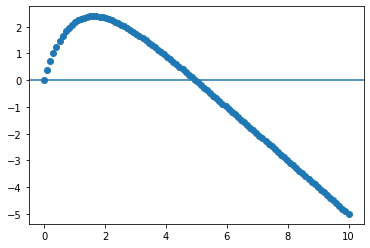

In [3]:
x = np.linspace(0, 10, num=100)
y = F(x)

plt.scatter(x, y)
plt.axhline(y=0)
plt.show()


In [4]:
def d(f, x, h=1e-6):
    return (f(x+h) - f(x-h))/(2*h)


def newton(f, d, xn, n=1000, e=1e-5):
    error = 1
    it = 0

    while error > e and it < n:
        try:
            x_n1 = xn - (f(xn)/d(f, xn))
            error = np.abs(f(xn)/d(f, xn))
        except ZeroDivisionError:
            print("Division por 0")

        xn = x_n1
        it += 1
    print(f'Raiz: {xn} Iteraciones: {it}')

    if it == n:
        return False
    else:
        return xn


In [5]:
def roots(tolerancia=8):
    r = np.linspace(-10, 10, num=10)
    roots = set(np.array([]))
    for i in range(len(r)):
        try:
            root = np.round((newton(F, d, r[i])), tolerancia)
            roots.add(root)
        except:
            pass

    return roots


In [6]:
roots()


Raiz: -2.2290353603821657e-17 Iteraciones: 15
Raiz: 1.3684273091109527e-17 Iteraciones: 13
Raiz: -1.0341059701559805e-11 Iteraciones: 10
Raiz: -7.069087632460543e-14 Iteraciones: 8
Raiz: 7.313441181873663e-17 Iteraciones: 6
Raiz: -3.9460077574657776e-14 Iteraciones: 8
Raiz: 4.965114231744276 Iteraciones: 4
Raiz: 4.965114231744279 Iteraciones: 3
Raiz: 4.965114231744277 Iteraciones: 4
Raiz: 4.965114231744276 Iteraciones: 4


{-0.0, 4.96511423}

In [7]:
root = newton(F, d, 6)


Raiz: 4.965114231744331 Iteraciones: 3


In [8]:
x = sym.Symbol('x', Real=True)
func = sym.exp(-0.5*x)*sym.sin(5*x)

func


exp(-0.5*x)*sin(5*x)

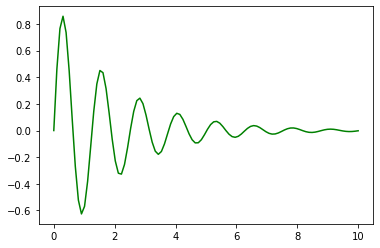

In [9]:
osc = sym.lambdify([x], func, 'numpy')
x = np.linspace(0, 10, 100)

plt.plot(x, osc(x), color='green')


# Legendre

In [10]:
def legendre(n):
    x = sym.Symbol('x', Real=True)
    y = sym.Symbol('y', Real=True)

    y = (x**2 - 1)**n

    p = sym.diff(y, x, n)/(2**n * np.math.factorial(n))

    return p


In [18]:
def leg_gen(n=None):
    counter = 1
    while not n or counter < n:
        leg = legendre(counter)
        counter += 1
        yield leg


In [19]:
n = 7
leg_list = list(leg_gen(n))


1
2
3
4
5


IndexError: list index out of range

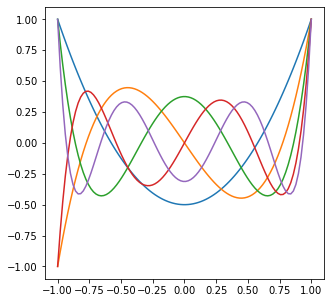

In [20]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

t = np.linspace(-1, 1, 100)
x = sym.Symbol('x', Real=True)

for i in range(1, n+1):
    pn = sym.lambdify([x], leg_list[i], 'numpy')
    print(f'{i}')
    ax.plot(t, pn(t), label=f'{i} Order')

ax.axhline(y=0, ls='- -')
ax.legend()
